<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-предобработка-данных" data-toc-modified-id="Загрузка-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и предобработка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-временного-ряда-по-часам" data-toc-modified-id="Анализ-временного-ряда-по-часам-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ временного ряда по часам</a></span></li><li><span><a href="#Анализ-временного-ряда-по-дням" data-toc-modified-id="Анализ-временного-ряда-по-дням-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ временного ряда по дням</a></span></li><li><span><a href="#Анализ-временного-ряда-по-неделям" data-toc-modified-id="Анализ-временного-ряда-по-неделям-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ временного ряда по неделям</a></span></li><li><span><a href="#Определение-стационарности-ряда" data-toc-modified-id="Определение-стационарности-ряда-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Определение стационарности ряда</a></span></li><li><span><a href="#Выводы-по-разделу" data-toc-modified-id="Выводы-по-разделу-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Выводы по разделу</a></span></li></ul></li><li><span><a href="#Обучение-моделей-и-их-предсказания" data-toc-modified-id="Обучение-моделей-и-их-предсказания-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей и их предсказания</a></span><ul class="toc-item"><li><span><a href="#Модель-SARIMAX" data-toc-modified-id="Модель-SARIMAX-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель SARIMAX</a></span></li><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-дерева-решений" data-toc-modified-id="Модель-дерева-решений-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель дерева решений</a></span></li><li><span><a href="#Выводы-по-разделу" data-toc-modified-id="Выводы-по-разделу-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выводы по разделу</a></span></li></ul></li><li><span><a href="#Выводы-по-проекту" data-toc-modified-id="Выводы-по-проекту-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы по проекту</a></span></li></ul></div>

#  Прогнозирование заказов такси

**Краткая информация о проекте:**
В проекте проводится прогнозирование заказов такси в аэропортах с помощью моделей машинного обучения.

В процессе выполения проекта проводится:
- Загрузка и предобработка данных;
- Анализ данных;
- Обучение и выбор лучшей модели машинного обучения для прогнозирования заказов такси в аэропортах.

**План работы:**
1. Провести загрузку данных и знакомство с ними;
2. Провести предобработку данных;
3. Провести анализ данных;
4. Провести обучение и выбор модели с дальнейшим прогнозированием заказов такси в аэропортах (задача регрессии).

**Цель и задачи проекта:**
- **Цель** - обучить и выбрать модель машинного обучения для прогнозирования заказов такси в аэропортах.
- **Задачи:**
1. Провести загрузку данных и знакомство с ними;
2. Провести предобработку данных:
- Сделать ресемплирование данных по 1 часу;
- Установить время в индекс.
3. Провести анализ данных:
- Разложить временной ряд на тренд, сезонность и шум;
- Провести тест на стационнарность временного ряда;
- Построить график автокорреляции.
5. Провести выбор и обучение модели с дальнейшим прогнозированием заказов такси в аэропортах;
- Провести подбор гиперпараметров нескольких моделей c помощью специальных функций;
- Определить лучшую модель по выбранной метрики качества.

In [1]:
!pip install -q -U scikit-learn

In [2]:
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer

import numpy as np
import pandas as pd
import seaborn as sns
import datetime

## Загрузка и предобработка данных

In [3]:
taxi = pd.read_csv(filepath_or_buffer='/datasets/taxi.csv', parse_dates=['datetime'], index_col=['datetime'])

In [4]:
display(taxi.head())
taxi.info()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Проведем ресемплирование данных по 1 часу.

In [5]:
taxi = taxi.resample('1H').sum()

In [6]:
taxi = taxi.sort_index()

In [7]:
display(taxi.head())

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [8]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


**Выводы по 1 разделу:** 
1. В изначальном датасете **26 496** наблюдений;
2. После ресемплирования наблюдений стало **4 416**;
3. Значение времени перемещено в индекс и тип данных изменен на `datetime`.

## Анализ данных

### Анализ временного ряда по часам

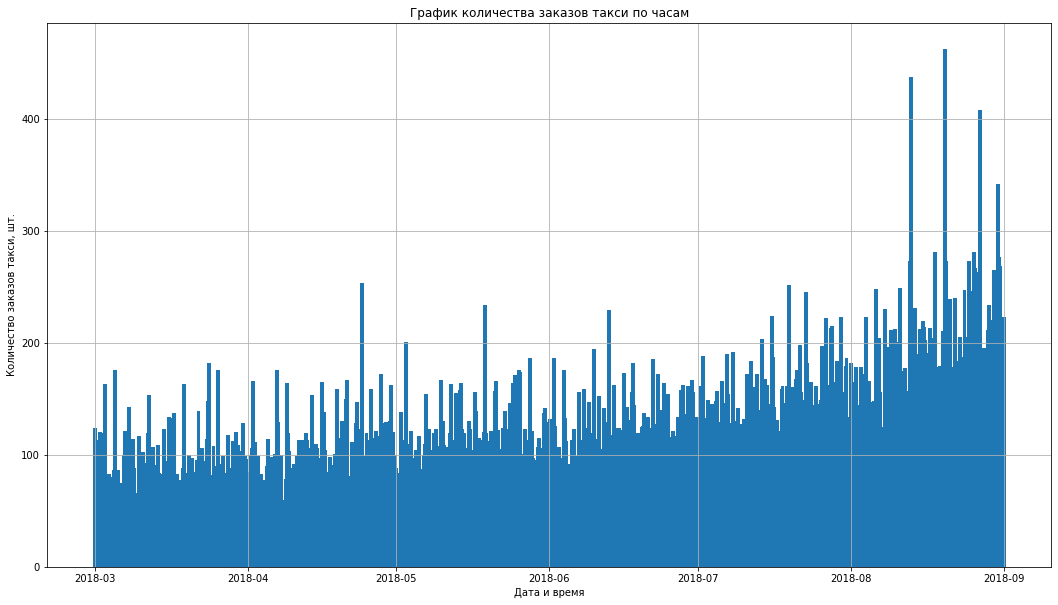

In [9]:
fig, ax = plt.subplots(figsize=(18, 10))

ax.bar(x=taxi.index, height=taxi['num_orders'])
ax.set(xlabel='Дата и время', ylabel='Количество заказов такси, шт.',
       title='График количества заказов такси по часам')
ax.grid()

plt.show()

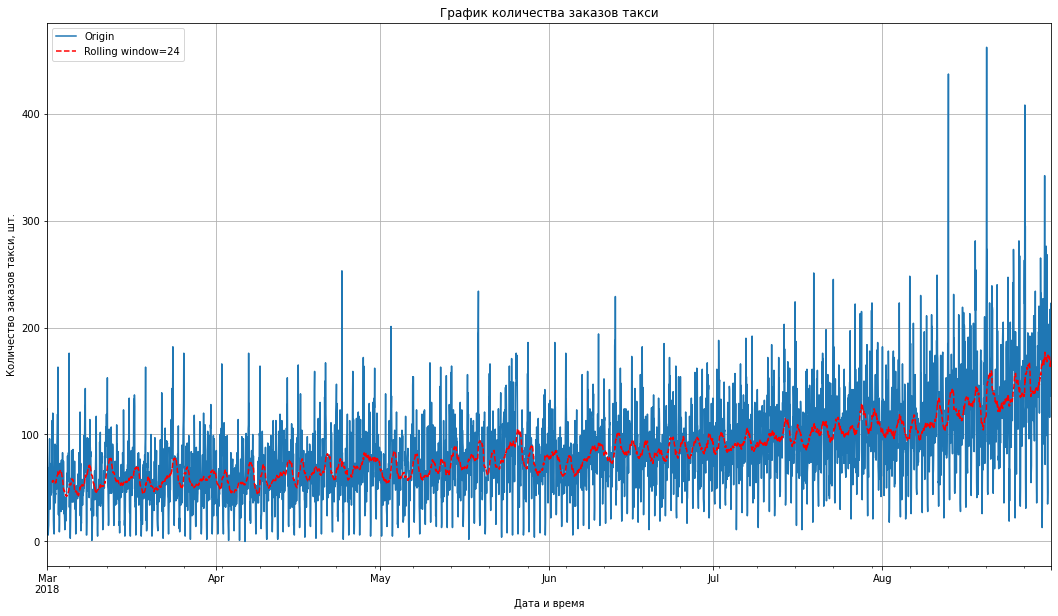

In [10]:
fig, ax = plt.subplots(figsize=(18,10))

taxi.plot(label='Original', ax=ax)
taxi.rolling(window=24).mean().plot(c='red', style='--', ax=ax)
ax.set(xlabel='Дата и время', ylabel='Количество заказов такси, шт.',
       title='График количества заказов такси')
ax.grid()

ax.legend(['Origin', 'Rolling window=24'])
plt.show()

Проведем разложение ряда на тренд, сезонность и шум.

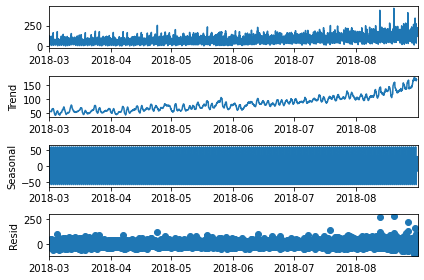

In [11]:
decompose = seasonal_decompose(taxi)
decompose.plot()
plt.show()

**Выводы по разложению:** В данных наблюдается возрастающий тренд. С начала августа тренд начинает ускоряться. Значение остатков при наступлении августа также начинает увеличиваться. Возможо, это связано с наступлением сезона отпусков.

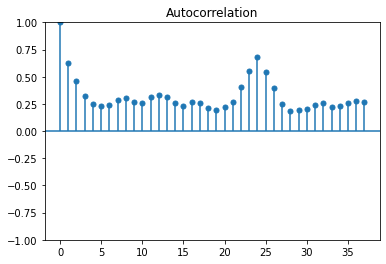

In [12]:
plot_acf(taxi, alpha=None)
plt.show()

**Выводы по автокорреляции:** наблюдается корреляция с 24 наблюдением. Данная корреляция является суточной сезонностью.

### Анализ временного ряда по дням

In [13]:
days = taxi.resample('1D').sum()

In [14]:
day_of_week = days.copy()
day_of_week['d'] = day_of_week.index
day_of_week['dow'] = day_of_week['d'].apply(lambda x: x.isoweekday())

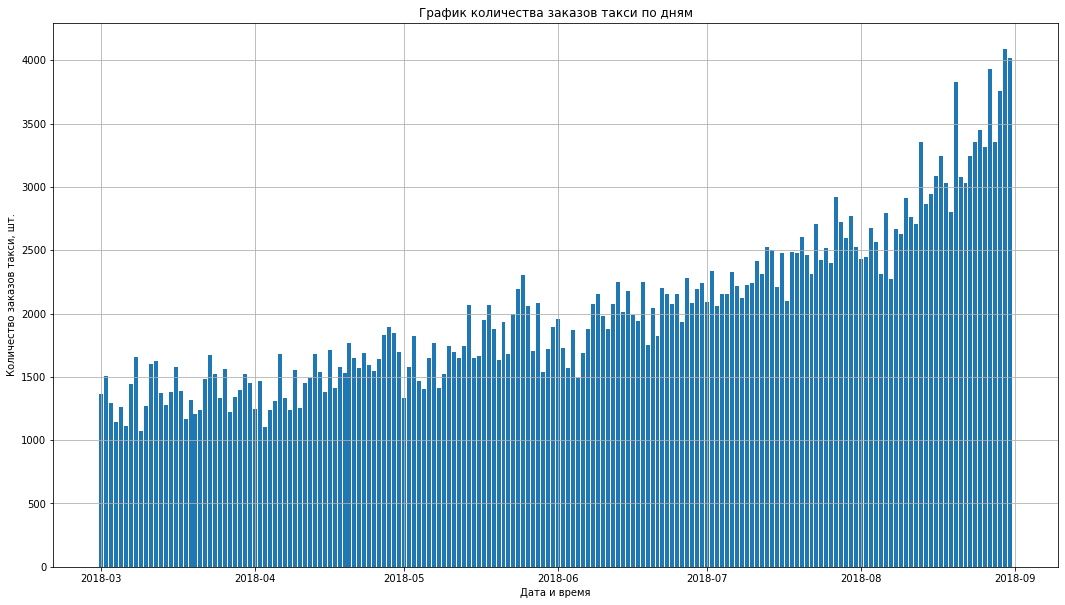

In [15]:
fig, ax = plt.subplots(figsize=(18, 10))

ax.bar(x=days.index, height=days['num_orders'])
ax.set(xlabel='Дата и время', ylabel='Количество заказов такси, шт.',
       title='График количества заказов такси по дням')
ax.grid()

plt.show()

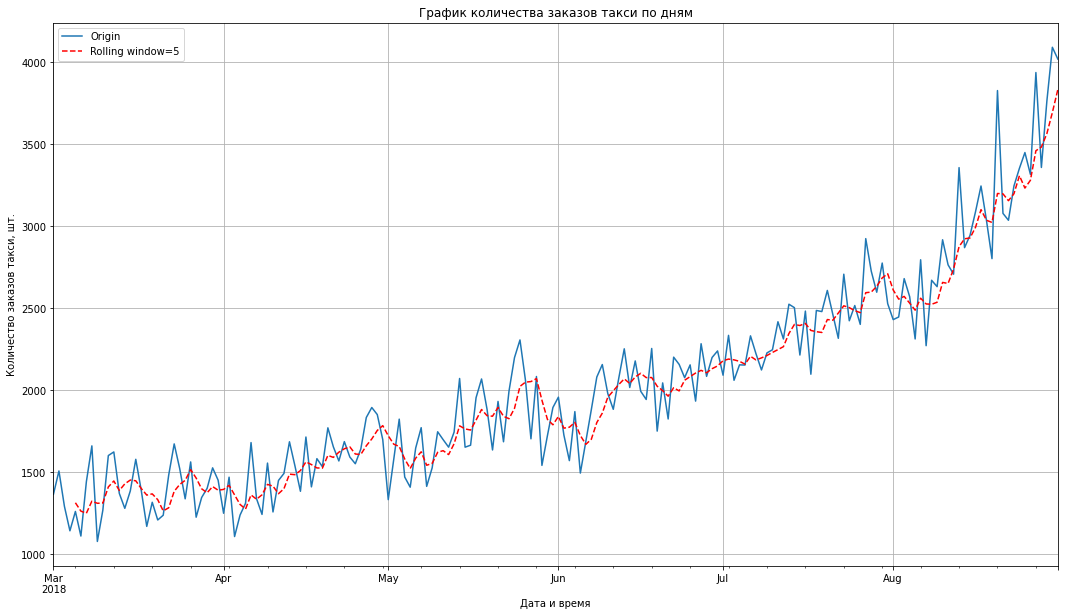

In [16]:
fig, ax = plt.subplots(figsize=(18,10))

days.plot(label='Original', ax=ax)
days.rolling(window=5).mean().plot(c='red', style='--', ax=ax)
ax.set(xlabel='Дата и время', ylabel='Количество заказов такси, шт.',
       title='График количества заказов такси по дням')
ax.grid()

ax.legend(['Origin', 'Rolling window=5'])
plt.show()

Рассмотрим более детально график количества такси по дням в разрезе недели.

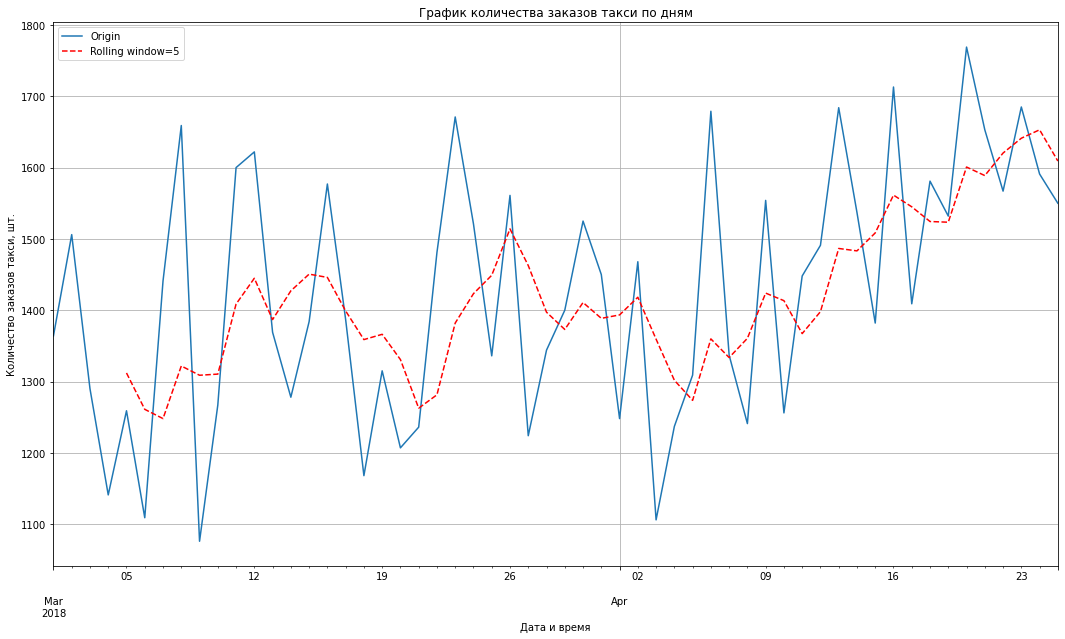

In [17]:
fig, ax = plt.subplots(figsize=(18,10))

days[:56].plot(label='Original', ax=ax)
days[:56].rolling(window=5).mean().plot(c='red', style='--', ax=ax)
ax.set(xlabel='Дата и время', ylabel='Количество заказов такси, шт.',
       title='График количества заказов такси по дням')
ax.grid()

ax.legend(['Origin', 'Rolling window=5'])
plt.show()

In [18]:
display('Среднее количество заказов такси в день: {}'.format(round(day_of_week['num_orders'].mean())))
display(day_of_week.groupby(by='dow')['num_orders'].mean())

'Среднее количество заказов такси в день: 2026'

dow
1    2165.923077
2    1848.269231
3    2010.115385
4    2055.851852
5    2187.370370
6    2012.346154
7    1895.807692
Name: num_orders, dtype: float64

В понедельник, четверг и пятницу количество заказов такси выше среднего.

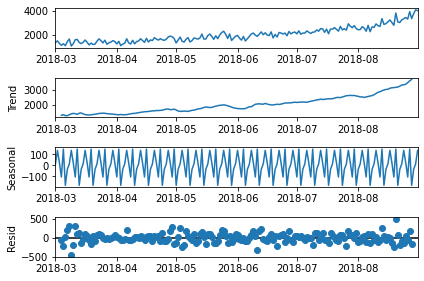

In [19]:
decompose = seasonal_decompose(days)
decompose.plot()
plt.show()

**Выводы по разложению:** в дополнение к прошлым выводам по разложению по дням, можно отметить, что в данных есть сезонность по дням.

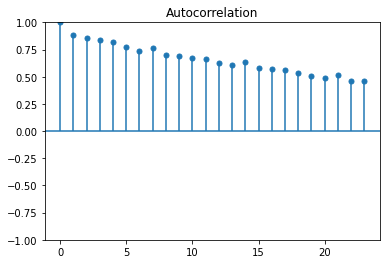

In [20]:
plot_acf(days, alpha=None)
plt.show()

**Выводы по автокорреляции:** наблюдается корреляция с каждым 7 наблюдением. Данная корреляция является недельной сезонностью.

### Анализ временного ряда по неделям

In [21]:
weeks = taxi.resample('1W').sum()

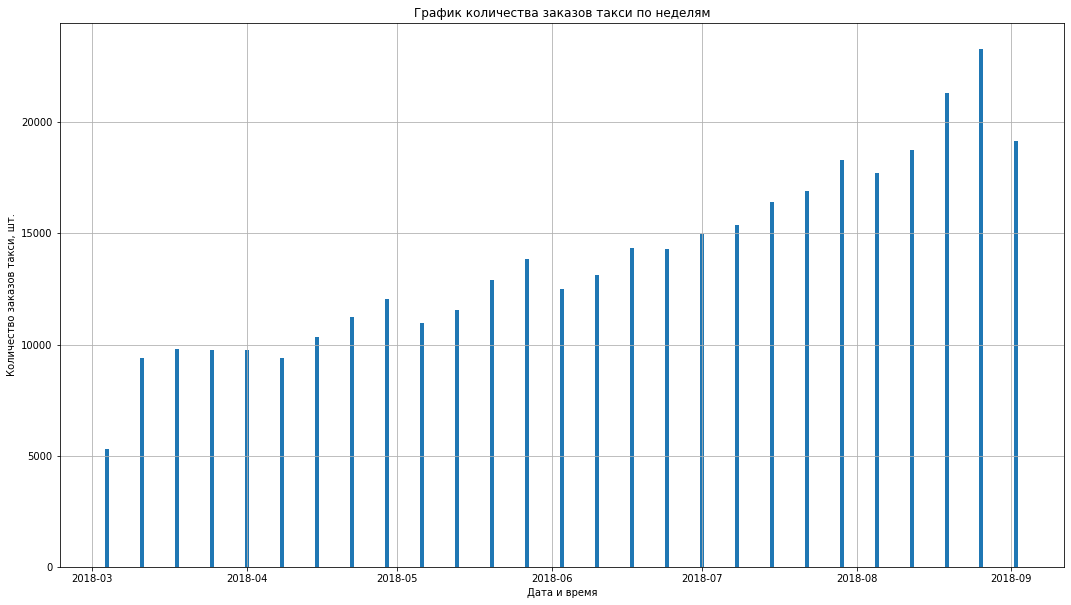

In [22]:
fig, ax = plt.subplots(figsize=(18, 10))

ax.bar(x=weeks.index, height=weeks['num_orders'])
ax.set(xlabel='Дата и время', ylabel='Количество заказов такси, шт.',
       title='График количества заказов такси по неделям')
ax.grid()

plt.show()

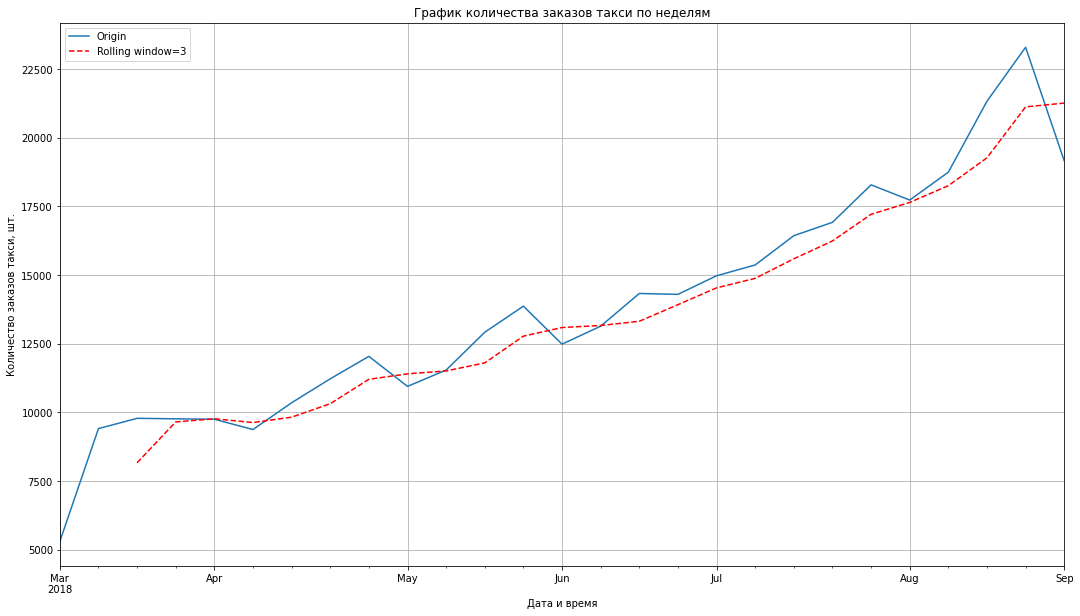

In [23]:
fig, ax = plt.subplots(figsize=(18,10))

weeks.plot(label='Original', ax=ax)
weeks.rolling(window=3).mean().plot(c='red', style='--', ax=ax)
ax.set(xlabel='Дата и время', ylabel='Количество заказов такси, шт.',
       title='График количества заказов такси по неделям')
ax.grid()

ax.legend(['Origin', 'Rolling window=3'])
plt.show()

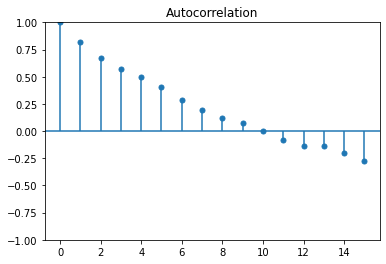

In [24]:
plot_acf(weeks, alpha=None)
plt.show()

**Выводы по автокорреляции:** в данных отсутствует корреляция по неделям.

### Определение стационарности ряда

Для определения принадлежности временного ряда к стационарному проведем тест **Дики-Фуллера**.

**Н0:** ряд нестационарный.

**Н1:** ряд стационарный.

Используем пороговое значение, равное **0.05 (5%)**.

In [25]:
adf_test = adfuller(taxi['num_orders'])

display('p-value = ' + str(adf_test[1]))

'p-value = 0.028940051402612906'

Отвергаем нулевую гипотезу - ряд стационарный.

### Выводы по разделу

1. В данных наблюдается возрастающий тренд. С начала августа тренд начинает ускоряться. Значение остатков при наступлении августа также начинает увеличиваться. Возможо, это связано с наступлением сезона отпусков;
2. В данных есть сезонность по дням (корреляция с каждым 24 наблюдением) и по неделям (корреляция с каждым 7 наблюдением);
3. В понедельник, четверг и пятницу количество заказов такси выше среднего.
4. Временной ряд стационарен.

## Обучение моделей и их предсказания

In [26]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


Возьмем размер тестовой выборки в размере 410 наблюдений (~10%).

In [27]:
train = taxi.iloc[:-410]
test = taxi.iloc[-410:]

### Модель SARIMAX

Примем размер валидационной выборки в размере 400 наблюдений (~10%).

In [28]:
X_train_sar = train.iloc[:-400]
X_val_sar = train.iloc[-400:]

In [29]:
model = SARIMAX(endog=X_train_sar, exog=None, order=(3, 1, 1), seasonal_order=(0, 1, 1, 24))

result = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58084D+00    |proj g|=  4.40840D-02


 This problem is unconstrained.



At iterate    5    f=  4.53654D+00    |proj g|=  2.89796D-02

At iterate   10    f=  4.48993D+00    |proj g|=  1.16158D-02

At iterate   15    f=  4.44680D+00    |proj g|=  5.84170D-02

At iterate   20    f=  4.44212D+00    |proj g|=  1.78090D-03

At iterate   25    f=  4.43976D+00    |proj g|=  4.71731D-03

At iterate   30    f=  4.43897D+00    |proj g|=  1.05868D-03

At iterate   35    f=  4.43896D+00    |proj g|=  1.51437D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     48      1     0     0   4.252D-05   4.439D+00
  F =   4.4389555223705335     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

In [30]:
start = len(X_train_sar)
end = len(X_train_sar) + 399 
pred_sar = result.predict(start, end)

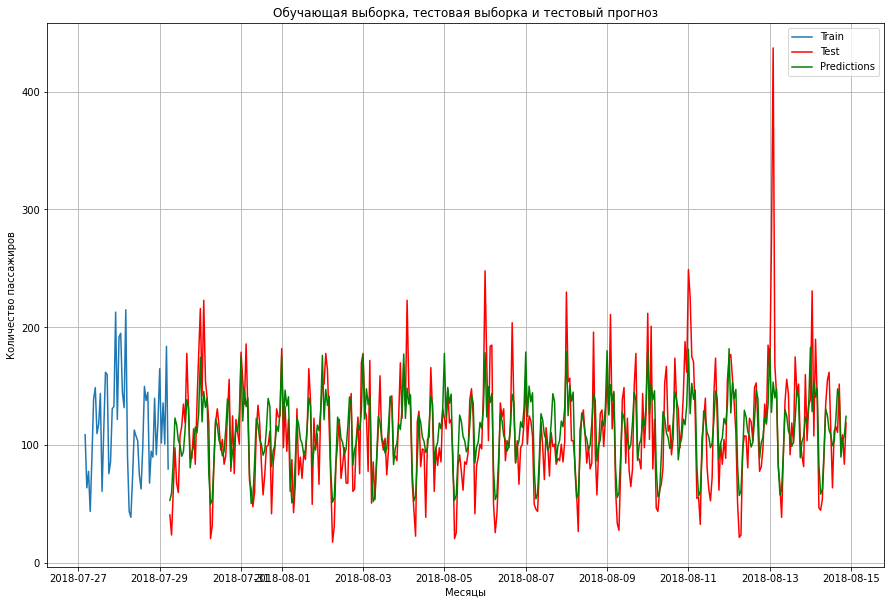

In [31]:
fig = plt.figure(figsize=(15,10))
plt.plot(X_train_sar[-50:], label='Train')
plt.plot(X_val_sar, color = "red", label='Test')
plt.plot(pred_sar, color = "green", label='Predictions')
 
plt.title("Обучающая выборка, тестовая выборка и тестовый прогноз")
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
plt.legend()

plt.grid()
 
plt.show()

In [32]:
rmse_sar = root_mean_squared_error(X_val_sar, pred_sar)
display(f'RMSE модели SARIMAX: {rmse_sar}')

'RMSE модели SARIMAX: 31.15183269876721'

### Модель линейной регрессии

In [33]:
new_data = taxi.copy()

In [34]:
for t in range(21, 30):
    new_data[f't-{t}'] = new_data.num_orders.shift(t)

new_data['d'] = new_data.index
new_data['dow'] = new_data['d'].apply(lambda x: x.isoweekday())
new_data['hour'] = new_data.index.hour
new_data['mean_6'] = new_data['num_orders'].rolling(6).mean().shift(1)
new_data['mean_12'] = new_data['num_orders'].rolling(12).mean().shift(1)

In [35]:
new_data = new_data.drop(columns='d')

In [36]:
new_data = new_data.dropna()

In [37]:
train_val = new_data.iloc[:-410, :]
test_data = new_data.iloc[-410:, :]

In [38]:
train_data = train_val.iloc[:-400, :]
val_data = train_val.iloc[-400:, :]

In [39]:
mean_hour = dict(train_data.groupby('hour')['num_orders'].mean())
mean_dow = dict(train_data.groupby('dow')['num_orders'].mean())

In [40]:
train_data['hour'] = list(map(mean_hour.get, train_data.hour))
val_data['hour'] = list(map(mean_hour.get, val_data.hour))
train_data['dow'] = list(map(mean_dow.get, train_data.dow))
val_data['dow'] = list(map(mean_dow.get, val_data.dow))

/tmp/ipykernel_127/84766129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['hour'] = list(map(mean_hour.get, train_data.hour))
/tmp/ipykernel_127/84766129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data['hour'] = list(map(mean_hour.get, val_data.hour))
/tmp/ipykernel_127/84766129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [41]:
X_train_other = train_data.drop(columns='num_orders')
y_train_other = train_data.num_orders

X_val_other = val_data.drop(columns='num_orders')
y_val_other = val_data.num_orders


model = LinearRegression()

In [42]:
model.fit(X_train_other, y_train_other)

LinearRegression()

In [43]:
preds_lin = model.predict(X_val_other)

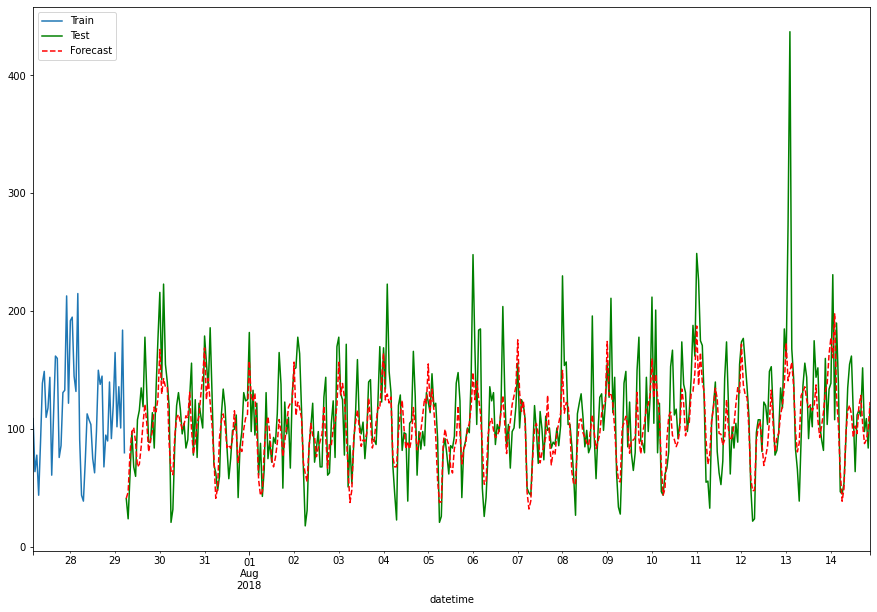

In [44]:
fig = plt.figure(figsize=(15,10))
new_data[-860:-810].num_orders.plot()
new_data[-810:-410].num_orders.plot(c='green')
pd.Series(index=X_val_other.index, data=preds_lin).plot(c='red', style='--')
plt.legend(['Train', 'Test', 'Forecast' ])

<AxesSubplot:>

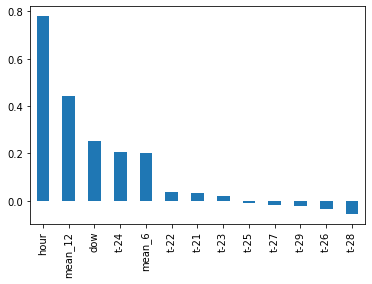

In [45]:
pd.Series(model.coef_, index=model.feature_names_in_).sort_values(ascending=False).plot(kind='bar')

In [46]:
rmse_linear = root_mean_squared_error(y_val_other, preds_lin)
display(f'RMSE модели линейной регрессии: {rmse_linear}')

'RMSE модели линейной регрессии: 33.63373202978962'

### Модель дерева решений

In [47]:
cv = TimeSeriesSplit(n_splits=9)
scorer = make_scorer(root_mean_squared_error, greater_is_better=False)

params = {'max_depth': range(3, 15)}

model = GridSearchCV(DecisionTreeRegressor(random_state=7), param_grid=params, cv=cv, scoring=scorer)

model.fit(X_train_other, y_train_other)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=9, test_size=None),
             estimator=DecisionTreeRegressor(random_state=7),
             param_grid={'max_depth': range(3, 15)},
             scoring=make_scorer(root_mean_squared_error, greater_is_better=False, response_method='predict'))

In [48]:
model.best_params_

{'max_depth': 5}

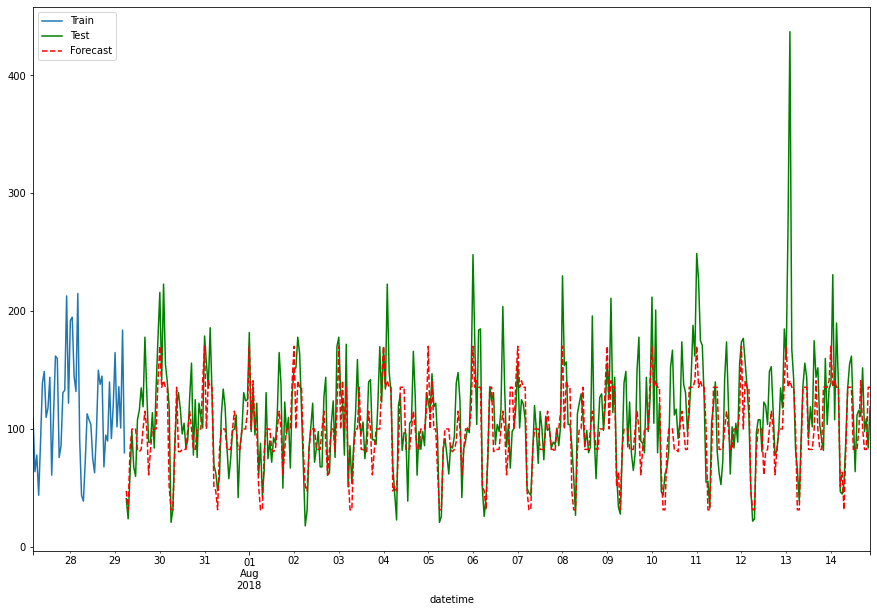

In [49]:
fig = plt.figure(figsize=(15,10))
preds_tree = model.predict(X_val_other)
new_data[-860:-810].num_orders.plot()
new_data[-810:-410].num_orders.plot(c='green')
pd.Series(index=X_val_other.index, data=preds_tree).plot(c='red', style='--')
plt.legend(['Train', 'Test', 'Forecast' ])

In [50]:
rmse_tree = root_mean_squared_error(y_val_other, preds_tree)
display(f'RMSE модели дерево решений: {rmse_tree}')

'RMSE модели дерево решений: 34.21000786102629'

In [51]:
table = pd.DataFrame({'model': ['sarimax', 'linear', 'decision_tree'],
                      'rmse_val': [rmse_sar, rmse_linear, rmse_tree]})

In [52]:
display(table)

,model,rmse_val
0,sarimax,31.151833
1,linear,33.633732
2,decision_tree,34.210008


Лучшая модель по метрики RMSE на валидационной выборке - `Sarimax`. Для тестирования примем ее.

In [53]:
start = len(train)
end = len(train) + 409
pred_sar_test = result.predict(start, end)

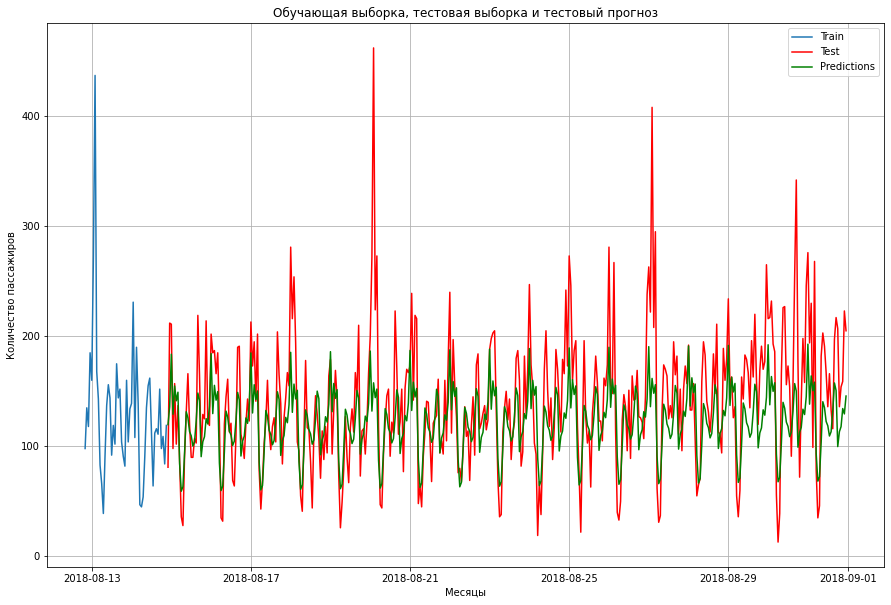

In [54]:
fig = plt.figure(figsize=(15,10))
plt.plot(train[-50:], label='Train')
plt.plot(test, color = "red", label='Test')
plt.plot(pred_sar_test, color = "green", label='Predictions')
 
plt.title("Обучающая выборка, тестовая выборка и тестовый прогноз")
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
plt.legend()

plt.grid()
 
plt.show()

In [55]:
rmse_sar_test = root_mean_squared_error(test, pred_sar_test)
display(f'RMSE модели SARIMAX: {rmse_sar_test}')

'RMSE модели SARIMAX: 46.55307377932235'

### Выводы по разделу

1. В процессе выполнения проекта было обучено 3 модели: `Sarimax`, `LinearRegression` и `DecisionTreeRegressor`;
2. По результатам обучения лучшую метрику на валидационной выборке показала модель `Sarimax` - 31.1, второе место заняла модель `LinearRegression` - 33.6 и на последнем месте `DecisionTreeRegressor` - 34.2;
3. По результату обучения и тестирования на валидационной выборке для предсказания на тестовой выборке была принята модель `Sarimax`. Значение метрики на тестовой выборке - 46.5. Данное значение проходит по требованиям проекта (RMSE < 48).

## Выводы по проекту

В изначальном датасете **26 496** наблюдений. После ресемплирования наблюдений стало **4 416**.

В процессе анализа данных было обнаружено:
1. В данных наблюдается возрастающий тренд. С начала августа тренд начинает ускоряться. Значение остатков при наступлении августа также начинает увеличиваться. Возможо, это связано с наступлением сезона отпусков;
2. В данных есть сезонность по дням (корреляция с каждым 24 наблюдением) и по неделям (корреляция с каждым 7 наблюдением);
3. В понедельник, четверг и пятницу количество заказов такси выше среднего.
4. Временной ряд стационарен.

В процессе обучения моделей были выполнены следующие шаги:
1. Было обучено 3 модели: `Sarimax`, `LinearRegression` и `DecisionTreeRegressor`;
2. По результатам обучения лучшую метрику на валидационной выборке показала модель `Sarimax` - 31.1, второе место заняла модель `LinearRegression` - 33.6 и на последнем месте `DecisionTreeRegressor` - 34.2;
3. По результату обучения и тестирования на валидационной выборке для предсказания на тестовой выборке была принята модель `Sarimax`. Значение метрики на тестовой выборке - 46.5. Данное значение проходит по требованиям проекта (RMSE < 48).